In [1]:
import spotipy as sp
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
#replace client_id and secret with your own!
#IMPORTANT: Make sure to whitelist your redirect_uri (API Dashboard -> your app -> edit settings -> Redirect URIs)

def get_token(scope, 
              username = 'mgbvox', 
              client_id='c8588eb78ab44e1f90d107c66d693891',
              client_secret='fcd94b9c703e4f2d86fb267849de9660'):
    token = util.prompt_for_user_token(username, 
                            scope = scope,
                            client_id=client_id,
                            client_secret=client_secret, 
                            redirect_uri='http://localhost:8888/callback')
    return token

In [3]:
'''
get:
Listening history
Store data, manipulate it
analysis independently

Access and write to google calendar
Integrate across multiple platforms

Instagram API: followers, look for artist followers

Separate: 
Web Crawling


'''

'\nget:\nListening history\nStore data, manipulate it\nanalysis independently\n\nAccess and write to google calendar\nIntegrate across multiple platforms\n\nInstagram API: followers, look for artist followers\n\nSeparate: \nWeb Crawling\n\n\n'

In [4]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [5]:
def flatten(S):
    if S == []:
        return S
    if isinstance(S[0], list):
        return flatten(S[0]) + flatten(S[1:])
    return S[:1] + flatten(S[1:])

In [6]:
scope = 'user-top-read'
token = get_token(scope)
sp = spotipy.Spotify(auth=token)
terms = ['short', 'medium', 'long']

term_df = pd.DataFrame(columns=terms)

for term in terms:
    result = sp.current_user_top_artists(limit=1000, time_range='{}_term'.format(term))
    term_df[term] = pd.Series(flatten([i['genres'] for i in result['items']])).value_counts()

NameError: name 'spotipy' is not defined

In [7]:
(term_df['long']-term_df['short']).dropna().sort_values()

NameError: name 'term_df' is not defined

(array([2., 0., 7., 0., 2., 0., 1., 0., 1., 1.]),
 array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]),
 <a list of 10 Patch objects>)

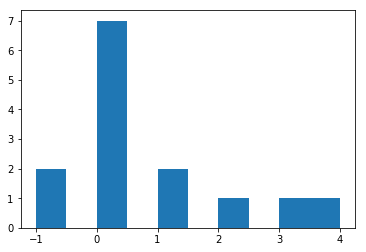

In [15]:
plt.hist((term_df['long']-term_df['short']).dropna())